# Question 2

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datascience import *

matplotlib.rcParams['figure.figsize'] = [16, 10]

In [2]:
table1 = Table.read_table('breast-cancer.csv')
table1
x = table1['Bland Chromatin']
y = table1['Single Epithelial Cell Size']
z = table1['Class']
z1 = z[z<1]
z2 = z[z>0]

In [3]:
table1

ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0
1017122,8,10,10,8,7,10,9,7,1,1
1018099,1,1,1,1,2,10,3,1,1,0
1018561,2,1,2,1,2,1,3,1,1,0
1033078,2,1,1,1,2,1,1,1,5,0
1033078,4,2,1,1,2,1,2,1,1,0


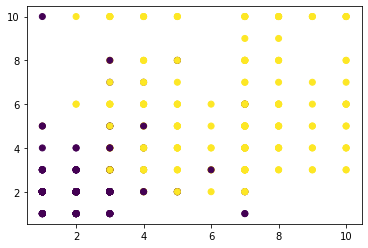

In [4]:
plt.scatter(x, y, c=z)
plt.show()

In [5]:
cancerPoints = []
noncancerPoints = []

for i in range(0, len(z)):
    if z[i] == 1:
        cancerPoints.append((x[i], y[i]))
    else:
        noncancerPoints.append((x[i], y[i]))
allPoints = list(zip(x,y))

def find_sizes(point_list):
    counter = {}
    sizes = [0] * len(point_list)
    for i in range(0, len(point_list) - 1):
        point = point_list[i]
        counter[point] = counter.get(point, 0) + 1
        sizes[i] = counter[point_list[i]]
    sizes = np.array([size * 30 for size in sizes])
    return sizes
    
cancerPointsSizes = find_sizes(cancerPoints)
noncancerPointsSizes = find_sizes(noncancerPoints)
allPointSizes = find_sizes(allPoints)

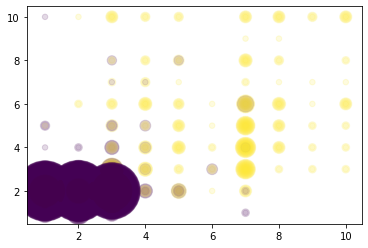

In [6]:
plt.scatter(x, y, c=z, s=allPointSizes, alpha=0.15, marker="o")

C:\Users\deniz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


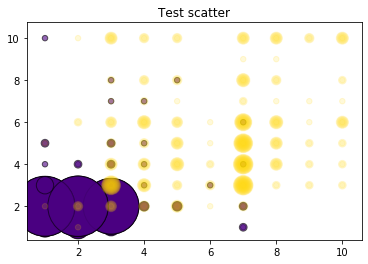

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, title="Test scatter")
x1, y1 = zip(*cancerPoints)
x2, y2 = zip(*noncancerPoints)
ax.scatter(x2, y2, color='indigo', s=noncancerPointsSizes, alpha=0.6, ec='black')
ax.scatter(x1, y1, color="gold", s=cancerPointsSizes, alpha=0.15)
fig.show()